In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import gamma
from scipy import optimize

from interaction import potential
from counterterm import local_LO_counterterm
import constants as const

plt.style.use('science')

In [22]:
rgflow_lo = np.loadtxt('rgflow_local_lo_a0_fix.txt')

In [23]:
index = 22
# index = 30
Ri, gi = rgflow_lo[index]

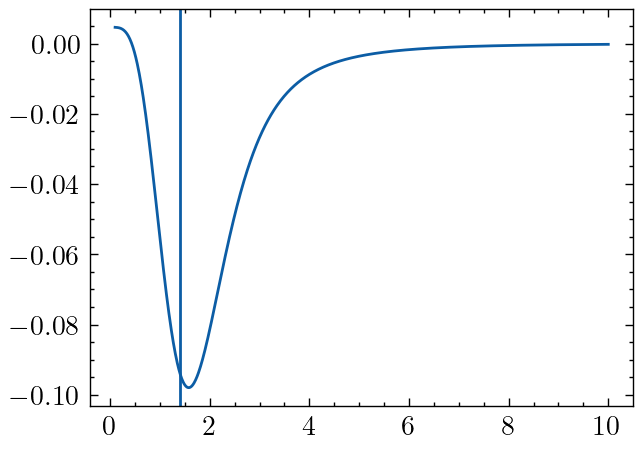

In [24]:
rs = np.linspace(0.1, 10, 1000)

fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(rs, potential(rs, Ri) + gi*local_LO_counterterm(rs, Ri))
ax.axvline(Ri);

In [25]:
for (Ri, gi) in rgflow_lo[index:, :]:
    f = lambda r: potential(r, Ri) + gi*local_LO_counterterm(r, Ri)
    result = optimize.fsolve(f, 0.75)
    print(result[0])

0.4330983891242088
0.5919058278593148
0.6881658588909676
0.7637422268681181
0.8280240762697062
0.8845699268269077
0.9350862021342312
0.9804805065169909
1.0212795049268246
1.0578456692056375
1.0904977212749412
1.1195647933574622
1.1453794422194465
1.1682802915668784
1.1885858241319716
1.206596138718228
1.2225840757796562
1.2367917991755193
1.249431816963129
1.260691292758362
1.2707307431089856
1.2796987994124358
1.287710536605702
1.2948757173375962
1.301289056761391
1.307034205064301
1.3121777372660541
1.3167871001034812


In [26]:
Phis = np.array([])
for (Ri, gi) in rgflow_lo[index:, :]:
    v = lambda r: potential(r, Ri) + gi*local_LO_counterterm(r, Ri)
    result = optimize.fsolve(v, 0.75)
    r_0 = result[0]
    
    f = lambda r: np.sqrt(-2*const.MU*(potential(r, Ri) + gi*local_LO_counterterm(r, Ri)))
    result = quad(f, r_0, np.infty)
    Phis = np.append(Phis, result[0])

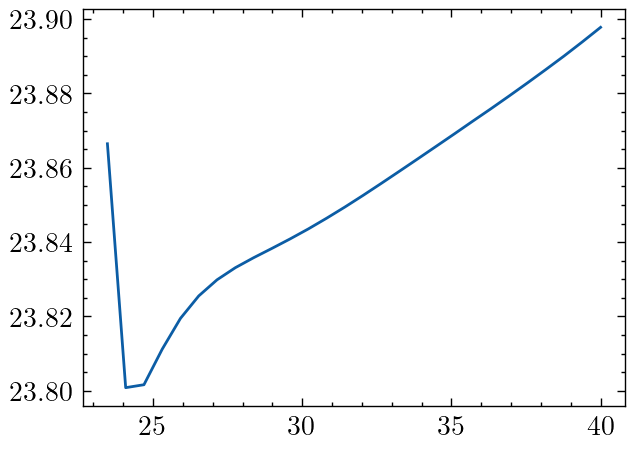

In [27]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(const.BETA4/rgflow_lo[index:, 0], Phis);

In [28]:
def I(n):
    return (n * gamma(1 - 1/n) * gamma(1/2 + 1/n)) / ((n-2) * np.sqrt(np.pi))

In [29]:
def flambaum_delta(k, Phi, n):
    return Phi + np.pi/4 - I(n) * (const.BETA4**(2/(n-2))*k)**((n-2)/n)

In [30]:
ks = np.linspace(0.01/const.BETA4, 40/const.BETA4, 100)

In [31]:
deltas = np.array([flambaum_delta(ks, phi, 4) for phi in Phis])

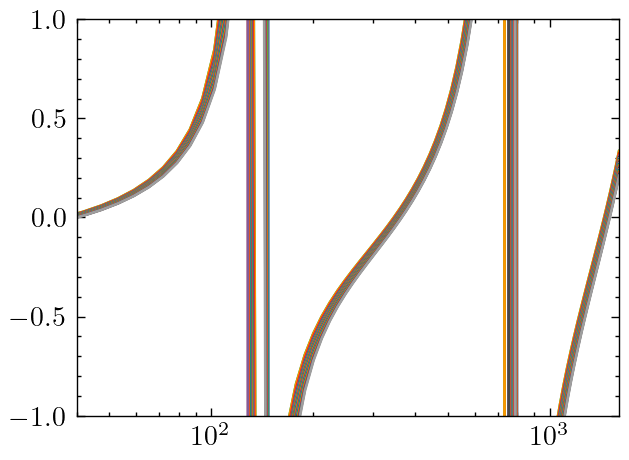

In [34]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for row in deltas:
    ax.plot((ks*const.BETA4)**2, ks/np.tan(row))

ax.set_ylim([-1, 1])
ax.set_xlim([40, 1600])
ax.set_xscale('log');

In [35]:
low, med, high = np.quantile(ks/np.tan(deltas), [0.16, 0.5, 0.84], axis=0)

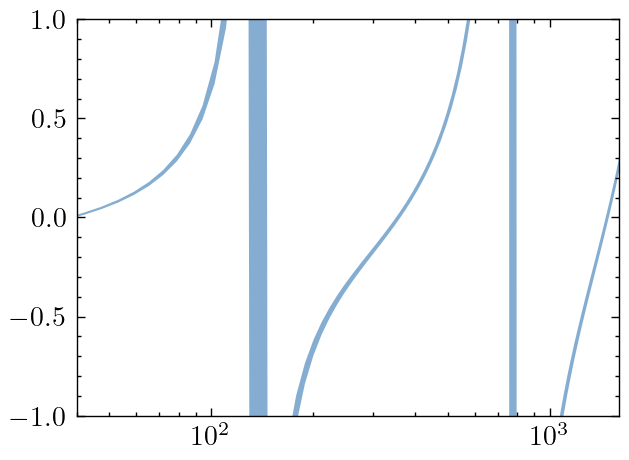

In [36]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

# ax.plot((ks*const.BETA4)**2, ks/np.tan(row))
ax.fill_between((ks*const.BETA4)**2, low, high, alpha=0.5)

ax.set_ylim([-1, 1])
ax.set_xlim([40, 1600])
ax.set_xscale('log');

In [37]:
np.savetxt('flambaum_kcd.txt', np.vstack((ks, low, high)).T)

In [38]:
deltas.shape

(28, 100)

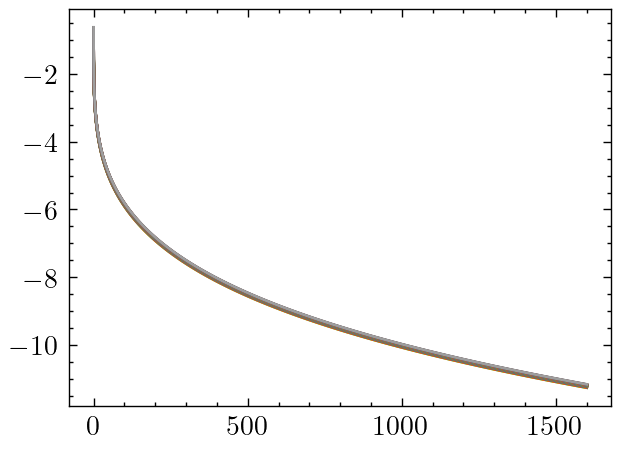

In [53]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for row in deltas:
    ax.plot((ks*const.BETA4)**2, row - 8*np.pi)

# ax.set_ylim([-1, 1])
# ax.set_xlim([40, 1600]);
# ax.set_xscale('log');

In [58]:
low_delta, med_delta, high_delta = np.quantile(deltas - 7*np.pi, [0.16, 0.5, 0.84], axis=0)

In [59]:
np.savetxt('flambaum_deltas.txt', np.vstack((ks, low_delta, med_delta, high_delta)).T)